In [13]:
import numpy as np
import pandas as pd

from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus 


In [21]:
social_data=pd.read_csv(r"C:\Users\Prarthana Saikia\Desktop\Praxis\Machine Learning\Machine Learning A-Z Template Folder\decision Tree\Decision_Tree_Classification\Social_Network_Ads.csv")
social_data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [27]:
#dummy=pd.get_dummies(social_data['Gender'])
#social_data=social_data.drop('Gender',axis=1)
#social_data=pd.concat([social_data,dummy],axis=1)


#cols= social_data.columns.tolist()
#columnsTitles = ['User ID', 'Age', 'EstimatedSalary','Female','Male','Purchased']
#social_data=social_data.reindex(columns=columnsTitles)


X=social_data.iloc[:,2:4].values
y=social_data.iloc[:,4].values

In [28]:
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size = 0.2, random_state = 0)

In [29]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

C:\Users\Prarthana Saikia\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [30]:
from sklearn.tree import DecisionTreeClassifier
model_tree=DecisionTreeClassifier(criterion='entropy',max_depth=3)
model_tree.fit(X_train,y_train)
print(model_tree)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


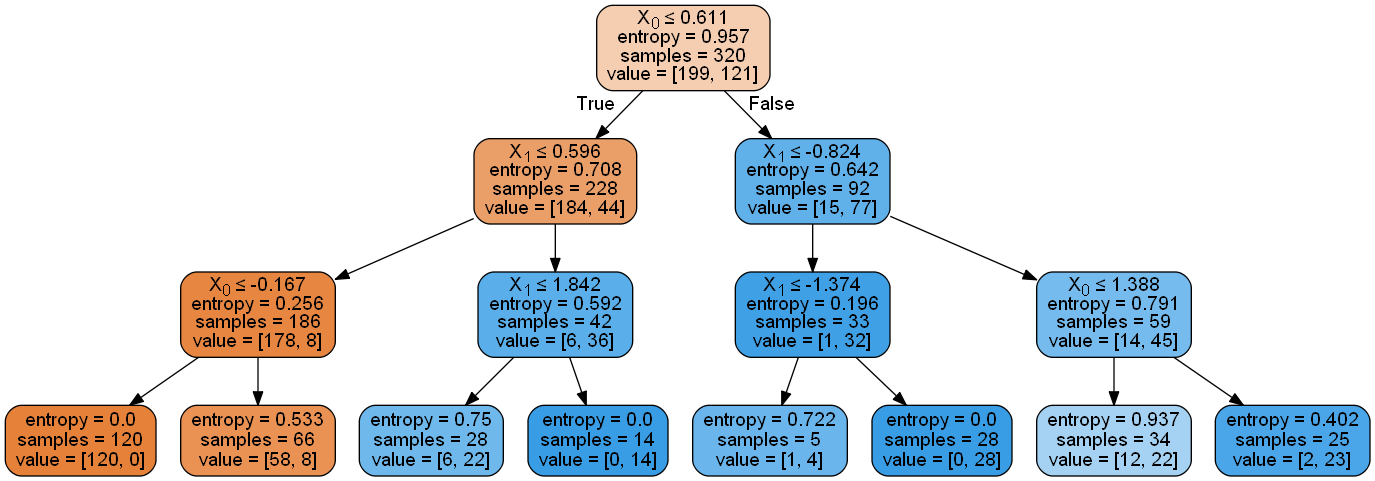

In [33]:
dot_data=StringIO()

export_graphviz(model_tree,out_file=dot_data,filled=True,rounded=True,special_characters=True,proportion=False)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [40]:
y_pred = model_tree.predict(X_test)

from sklearn.metrics import confusion_matrix,cohen_kappa_score, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(cohen_kappa_score(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[55  3]
 [ 1 21]]
0.878048780488
0.95


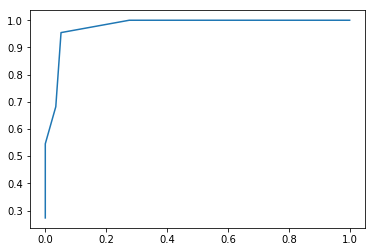

In [38]:


pred_prob =model_tree.predict_proba(X=X_test)   #find predicted probabilietes of input variables of test set
threshold_vals = np.linspace(0.0,1.0,num=10)
from sklearn.metrics import roc_curve
tpr = []
fpr = []
for th in threshold_vals:
       y_cap = np.where(pred_prob[:,0]<=th, 1,0)  
       cm = confusion_matrix(y_test,y_cap)  
       #print(cm)
       tpr.append(cm[1,1]/sum(cm[1,:]))
       fpr.append(cm[0,1]/sum(cm[0,:]))


       
import matplotlib.pyplot as plt
plt.plot(fpr, tpr)
plt.show()
tpr1, fpr1, th = roc_curve(y_test, pred_prob[:,0])
plt.plot(fpr1, tpr1)